In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pydp as dp  # PyDP
from pydp.algorithms.laplacian import BoundedMean, Count
from mpl_toolkits.mplot3d import Axes3D

print("✅ Libraries imported successfully.")

✅ Libraries imported successfully.


In [3]:
# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
           "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
           "hours-per-week", "native-country", "income"]



In [4]:
data = pd.read_csv(url, names=columns, na_values=" ?", skipinitialspace=True)
data.dropna(inplace=True)

In [7]:
data = data[["age", "education", "hours-per-week", "income", "sex"]]
print("✅ Data loaded and cleaned. Number of rows:", len(data))

✅ Data loaded and cleaned. Number of rows: 32561


In [8]:
# Privacy budget values
epsilons = [0.1, 0.5, 1.0, 2.0, 5.0]

In [9]:
# Initialize result container
results = {
    "epsilon": [],
    "true_mean_age": [],
    "dp_mean_age": [],
    "true_mean_hours": [],
    "dp_mean_hours": [],
    "true_count_bachelors": [],
    "dp_count_bachelors": []
}


In [10]:
# Compute true values
true_mean_age = data["age"].mean()
true_mean_hours = data["hours-per-week"].mean()
true_count_bachelors = (data["education"] == "Bachelors").sum()
print("✅ True statistics computed.")


✅ True statistics computed.


In [11]:
# DP bounds
age_bounds = (17, 90)
hours_bounds = (1, 99)

In [12]:
# Differential Privacy Calculations
for epsilon in epsilons:
    dp_age = BoundedMean(epsilon=epsilon, lower_bound=age_bounds[0], upper_bound=age_bounds[1])
    dp_age.add_entries(data["age"].tolist())
    dp_mean_age = dp_age.result()

    dp_hours = BoundedMean(epsilon=epsilon, lower_bound=hours_bounds[0], upper_bound=hours_bounds[1])
    dp_hours.add_entries(data["hours-per-week"].tolist())
    dp_mean_hours = dp_hours.result()

    dp_counter = Count(epsilon=epsilon)
    dp_counter.add_entries((data["education"] == "Bachelors").astype(int).tolist())
    dp_count_bachelors = dp_counter.result()

    results["epsilon"].append(epsilon)
    results["true_mean_age"].append(true_mean_age)
    results["dp_mean_age"].append(dp_mean_age)
    results["true_mean_hours"].append(true_mean_hours)
    results["dp_mean_hours"].append(dp_mean_hours)
    results["true_count_bachelors"].append(true_count_bachelors)
    results["dp_count_bachelors"].append(dp_count_bachelors)

    print(f"✅ DP stats computed for ε = {epsilon}")


✅ DP stats computed for ε = 0.1
✅ DP stats computed for ε = 0.5
✅ DP stats computed for ε = 1.0
✅ DP stats computed for ε = 2.0
✅ DP stats computed for ε = 5.0


In [13]:
# Convert to DataFrame
results_df = pd.DataFrame(results)
print("\n📄 Differential Privacy Results:")
print(results_df)



📄 Differential Privacy Results:
   epsilon  true_mean_age  dp_mean_age  true_mean_hours  dp_mean_hours  \
0      0.1      38.581647    38.566404        40.437456      40.392428   
1      0.5      38.581647    38.586253        40.437456      40.435956   
2      1.0      38.581647    38.580735        40.437456      40.441680   
3      2.0      38.581647    38.582624        40.437456      40.437876   
4      5.0      38.581647    38.581340        40.437456      40.438346   

   true_count_bachelors  dp_count_bachelors  
0                  5355               32562  
1                  5355               32561  
2                  5355               32561  
3                  5355               32561  
4                  5355               32561  


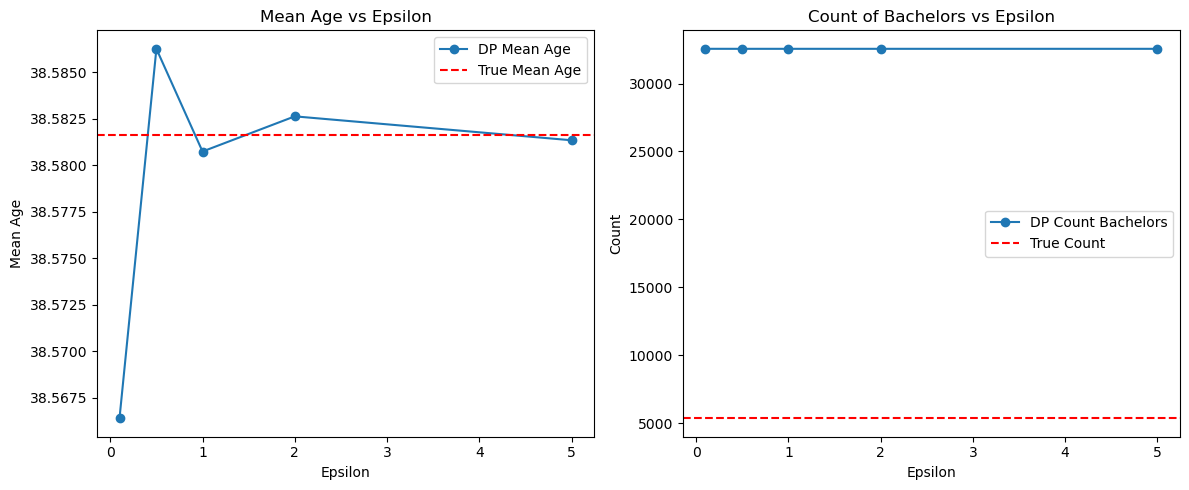

📊 Plot displayed successfully.


In [17]:
# Plotting
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(results_df["epsilon"], results_df["dp_mean_age"], label="DP Mean Age", marker='o')
plt.axhline(y=true_mean_age, color='r', linestyle='--', label="True Mean Age")
plt.title("Mean Age vs Epsilon")
plt.xlabel("Epsilon")
plt.ylabel("Mean Age")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(results_df["epsilon"], results_df["dp_count_bachelors"], label="DP Count Bachelors", marker='o')
plt.axhline(y=true_count_bachelors, color='r', linestyle='--', label="True Count")
plt.title("Count of Bachelors vs Epsilon")
plt.xlabel("Epsilon")
plt.ylabel("Count")
plt.legend()

plt.tight_layout()
plt.show()
print("📊 Plot displayed successfully.")


C:\Users\Level 0\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Level 0\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


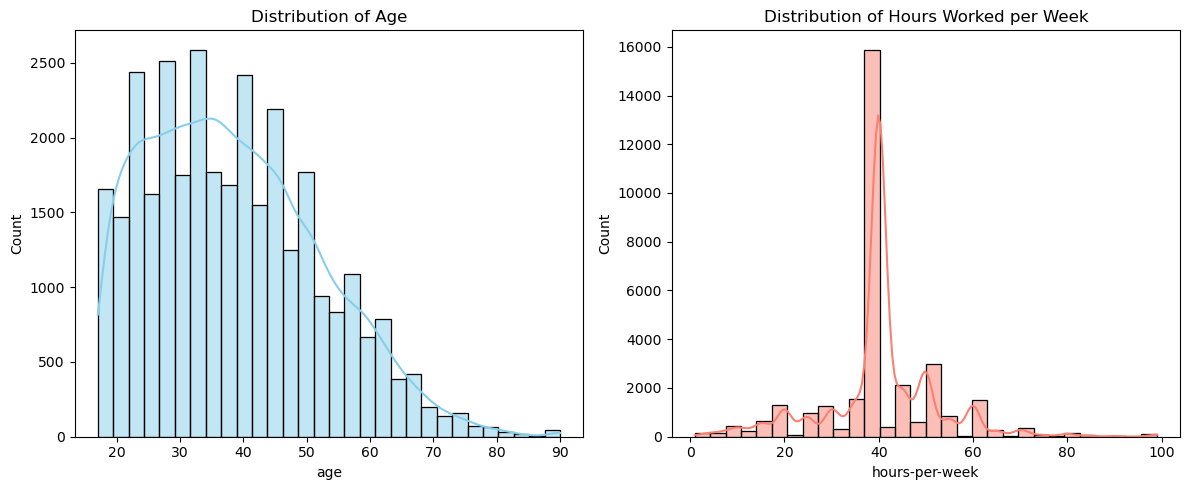

In [22]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data['age'], kde=True, bins=30, color='skyblue')
plt.title("Distribution of Age")

plt.subplot(1, 2, 2)
sns.histplot(data['hours-per-week'], kde=True, bins=30, color='salmon')
plt.title("Distribution of Hours Worked per Week")

plt.tight_layout()
plt.show()


C:\Users\Level 0\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


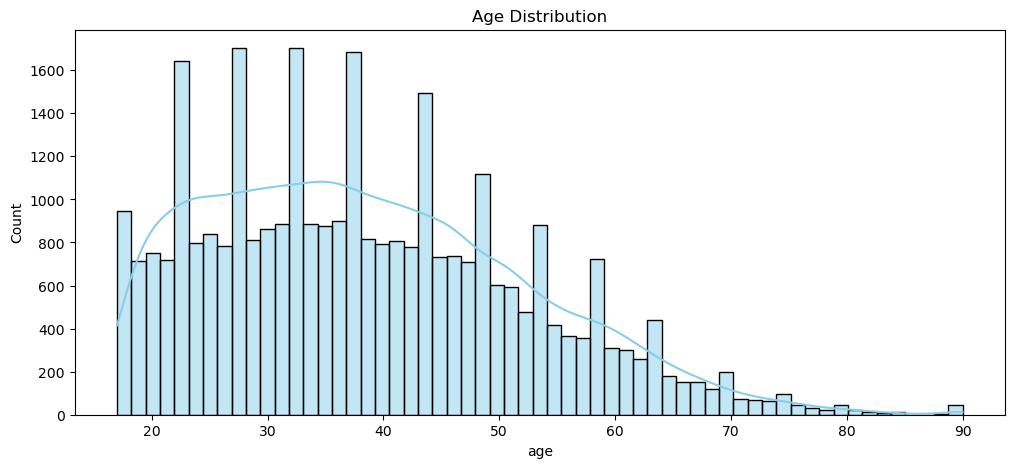

C:\Users\Level 0\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


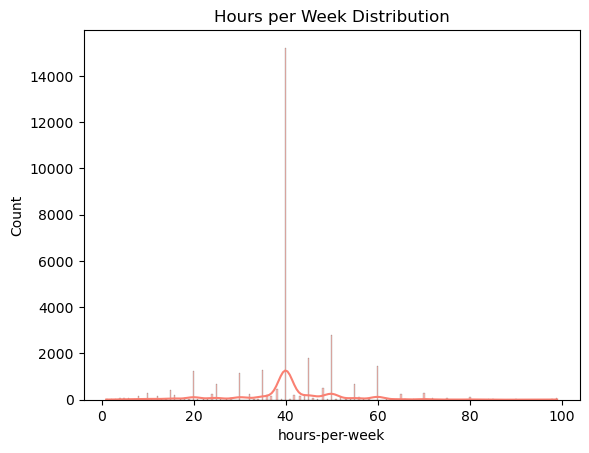

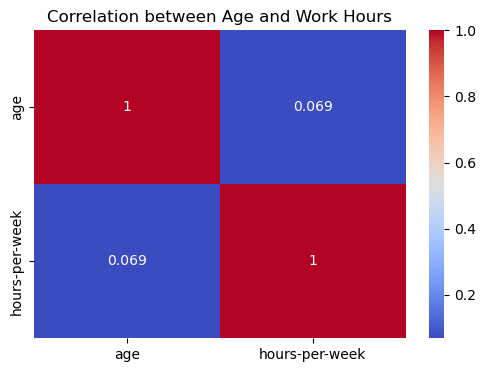

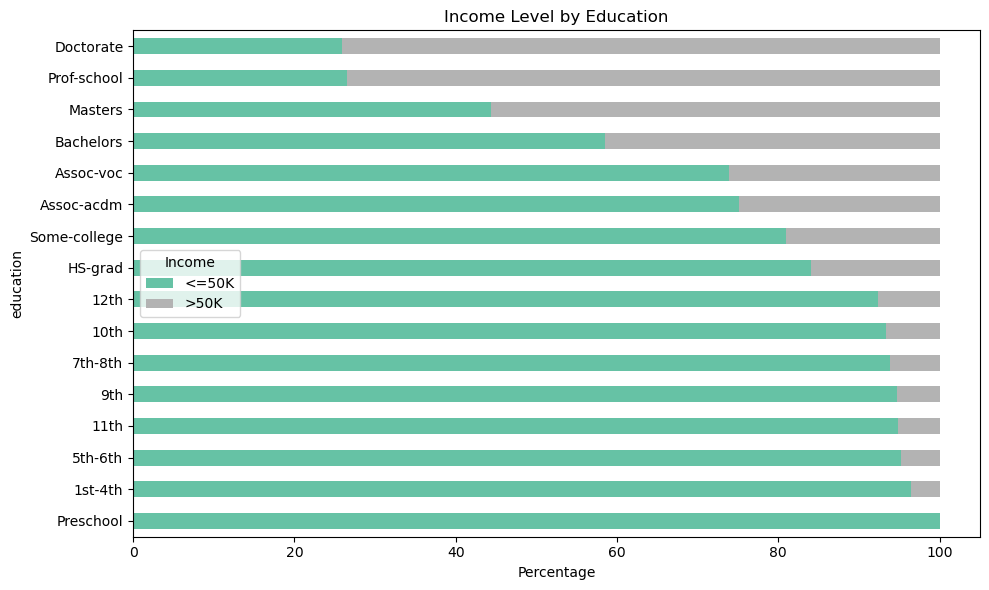

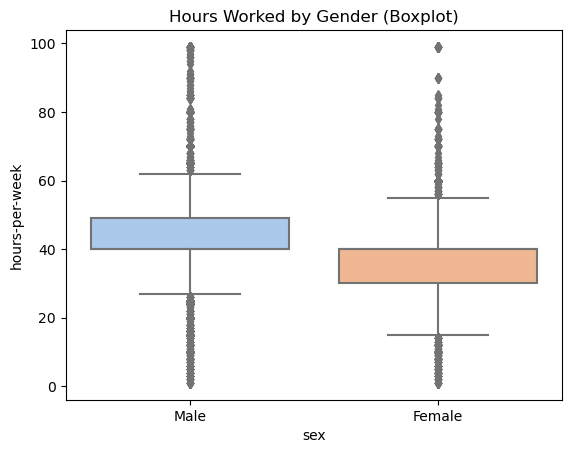

In [30]:
# 1. Distribution of numerical features
plt.figure(figsize=(12, 5))
sns.histplot(data['age'], kde=True, color='skyblue')
plt.title("Age Distribution")
plt.show()

sns.histplot(data['hours-per-week'], kde=True, color='salmon')
plt.title("Hours per Week Distribution")
plt.show()

# 2. Correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(data[["age", "hours-per-week"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation between Age and Work Hours")
plt.show()

# 3. Income by education
edu_income = pd.crosstab(data['education'], data['income'], normalize='index') * 100
edu_income.sort_values(by='>50K').plot(kind='barh', stacked=True, figsize=(10, 6), colormap='Set2')
plt.title("Income Level by Education")
plt.xlabel("Percentage")
plt.legend(title="Income")
plt.tight_layout()
plt.show()

# 4. Boxplot for outliers
sns.boxplot(x='sex', y='hours-per-week', data=data, palette="pastel")
plt.title("Hours Worked by Gender (Boxplot)")
plt.show()

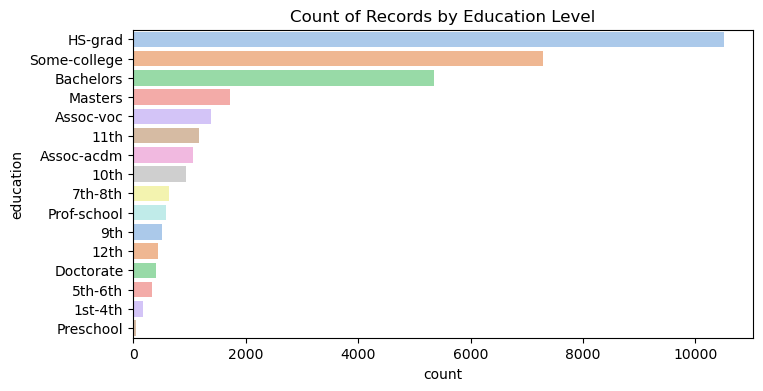

In [26]:
plt.figure(figsize=(8, 4))
sns.countplot(y='education', data=data, order=data['education'].value_counts().index, palette="pastel")
plt.title("Count of Records by Education Level")
plt.show()


C:\Users\Level 0\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


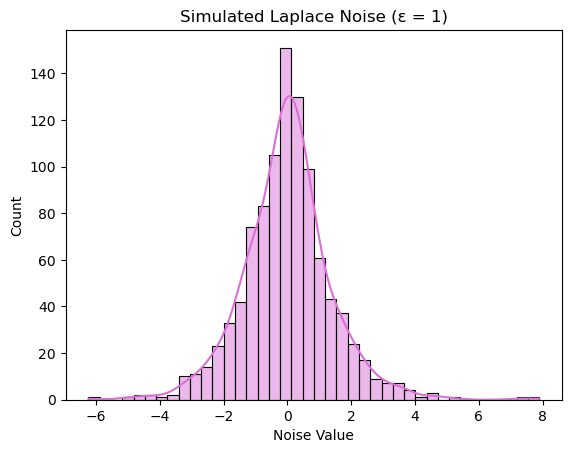

In [31]:
noise = np.random.laplace(loc=0, scale=1.0, size=1000)
sns.histplot(noise, kde=True, bins=40, color="orchid")
plt.title("Simulated Laplace Noise (ε = 1)")
plt.xlabel("Noise Value")
plt.show()


In [38]:
# DP Segment: Applying PyDP with BoundedMean and Count

import pydp as dp
from pydp.algorithms.laplacian import BoundedMean, Count

# Reuse the same filtered data
epsilons = [0.1, 0.5, 1.0, 2.0, 5.0]
# Initialize result container
results = {
    "epsilon": [],
    "true_mean_age": [],
    "dp_mean_age": [],
    "true_mean_hours": [],
    "dp_mean_hours": [],
    "true_count_bachelors": [],
    "dp_count_bachelors": [],
    "error_mean_age": [],
    "error_mean_hours": []
}

true_mean_age = data["age"].mean()
true_mean_hours = data["hours-per-week"].mean()
true_count_bachelors = (data["education"] == "Bachelors").sum()

print("True Mean Age: ", true_mean_age)
print("True Mean Hours: ", true_mean_hours)
print("True Count Bachelors: ", true_count_bachelors)
print("✅ True statistics computed.")



True Mean Age:  38.58164675532078
True Mean Hours:  40.437455852092995
True Count Bachelors:  5355
✅ True statistics computed.


✅ DP stats computed for ε = 0.1
✅ DP stats computed for ε = 0.5
✅ DP stats computed for ε = 1.0
✅ DP stats computed for ε = 2.0
✅ DP stats computed for ε = 5.0


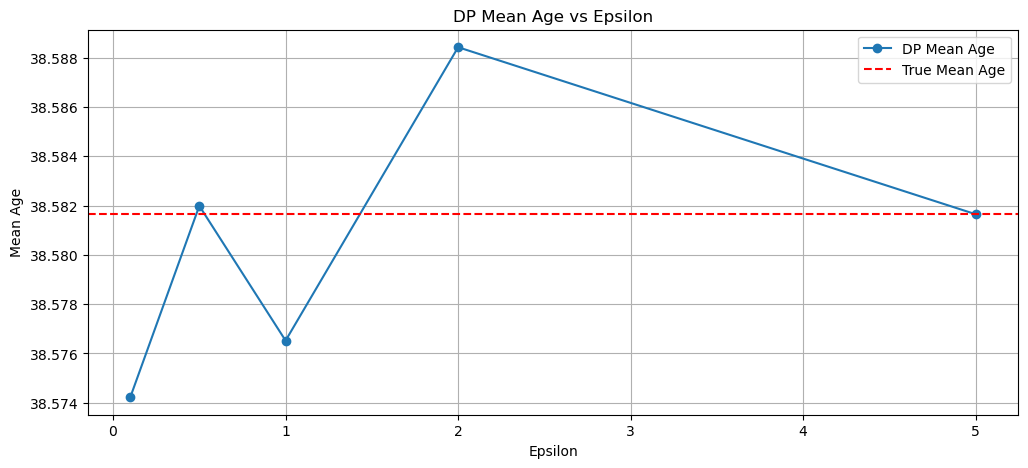

C:\Users\Level 0\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Level 0\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


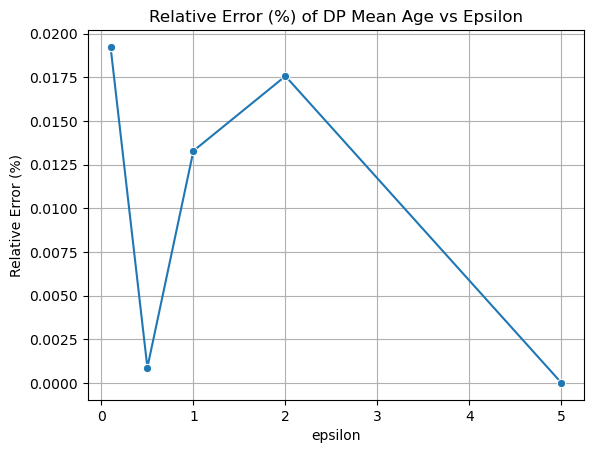

In [39]:

for epsilon in epsilons:
    # Bounded Mean for age
    dp_age = BoundedMean(epsilon=epsilon, lower_bound=age_bounds[0], upper_bound=age_bounds[1])
    dp_age.add_entries(data["age"].tolist())
    dp_mean_age = dp_age.result()


    # Bounded Mean for hours-per-week
    dp_hours = BoundedMean(epsilon=epsilon, lower_bound=hours_bounds[0], upper_bound=hours_bounds[1])
    dp_hours.add_entries(data["hours-per-week"].tolist())
    dp_mean_hours = dp_hours.result()

    # Count for Bachelors
    dp_counter = Count(epsilon=epsilon)
    dp_counter.add_entries((data["education"] == "Bachelors").astype(int).tolist())
    dp_count_bachelors = dp_counter.result()
    
    # Calculate absolute errors
    error_age = abs(dp_mean_age - true_mean_age)
    error_hours = abs(dp_mean_hours - true_mean_hours)


    # Store results
    results["epsilon"].append(epsilon)
    results["true_mean_age"].append(true_mean_age)
    results["dp_mean_age"].append(dp_mean_age)
    results["true_mean_hours"].append(true_mean_hours)
    results["dp_mean_hours"].append(dp_mean_hours)
    results["true_count_bachelors"].append(true_count_bachelors)
    results["dp_count_bachelors"].append(dp_count_bachelors)
    results["error_mean_age"].append(error_age)
    results["error_mean_hours"].append(error_hours)
    print(f"✅ DP stats computed for ε = {epsilon}")

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Visualize DP results
plt.figure(figsize=(12, 5))
plt.plot(results_df["epsilon"], results_df["dp_mean_age"], label="DP Mean Age", marker='o')
plt.axhline(y=true_mean_age, color='r', linestyle='--', label="True Mean Age")
plt.title("DP Mean Age vs Epsilon")
plt.xlabel("Epsilon")
plt.ylabel("Mean Age")
plt.legend()
plt.grid(True)
plt.show()

# Optional: Relative error
results_df["rel_error_age"] = 100 * abs(results_df["dp_mean_age"] - true_mean_age) / true_mean_age
sns.lineplot(x="epsilon", y="rel_error_age", data=results_df, marker='o')
plt.title("Relative Error (%) of DP Mean Age vs Epsilon")
plt.ylabel("Relative Error (%)")
plt.grid(True)
plt.show()


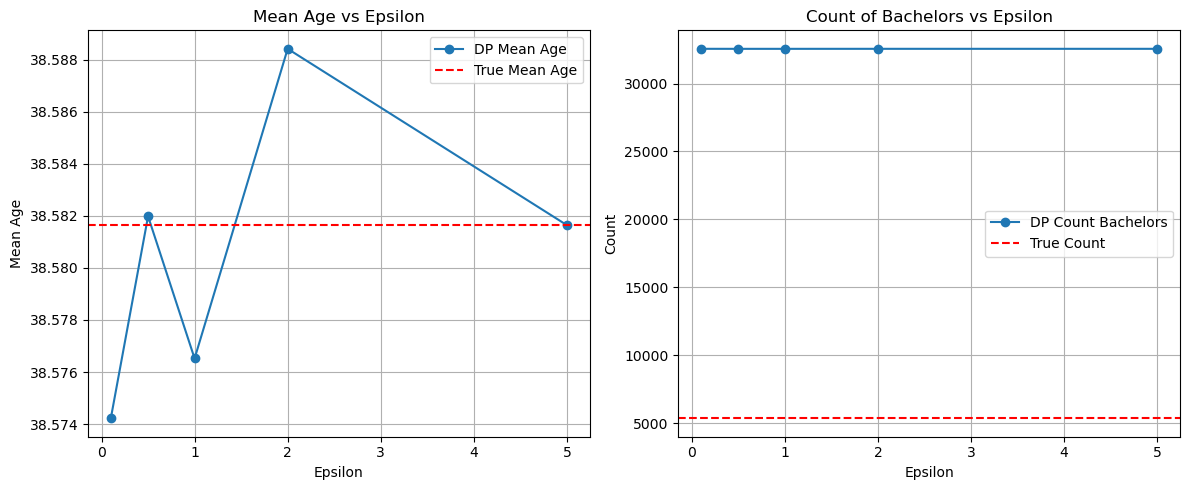

C:\Users\Level 0\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Level 0\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


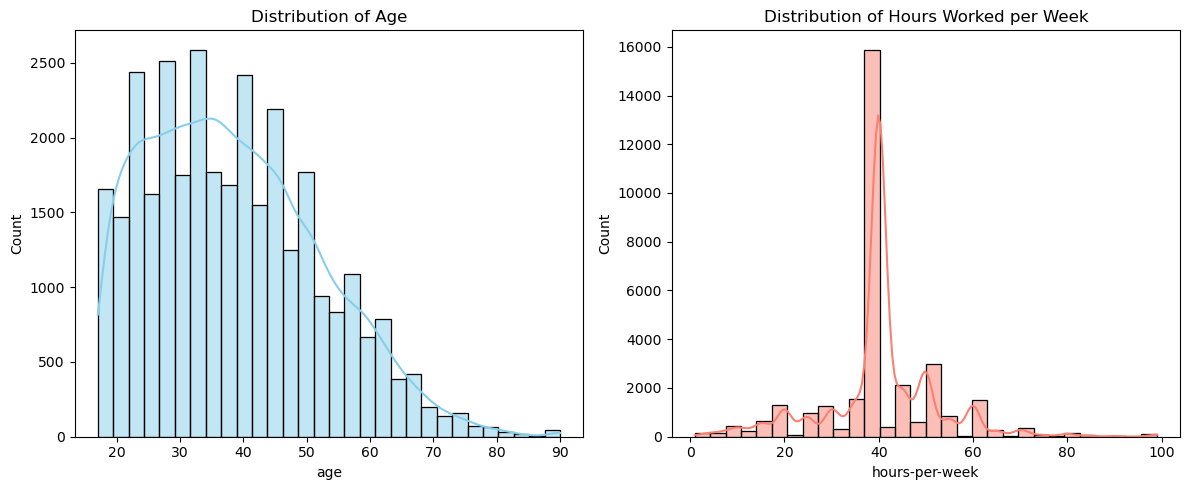

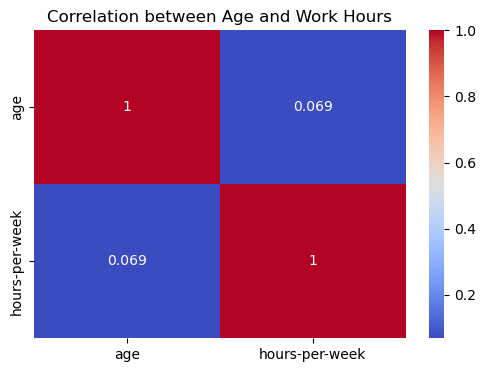

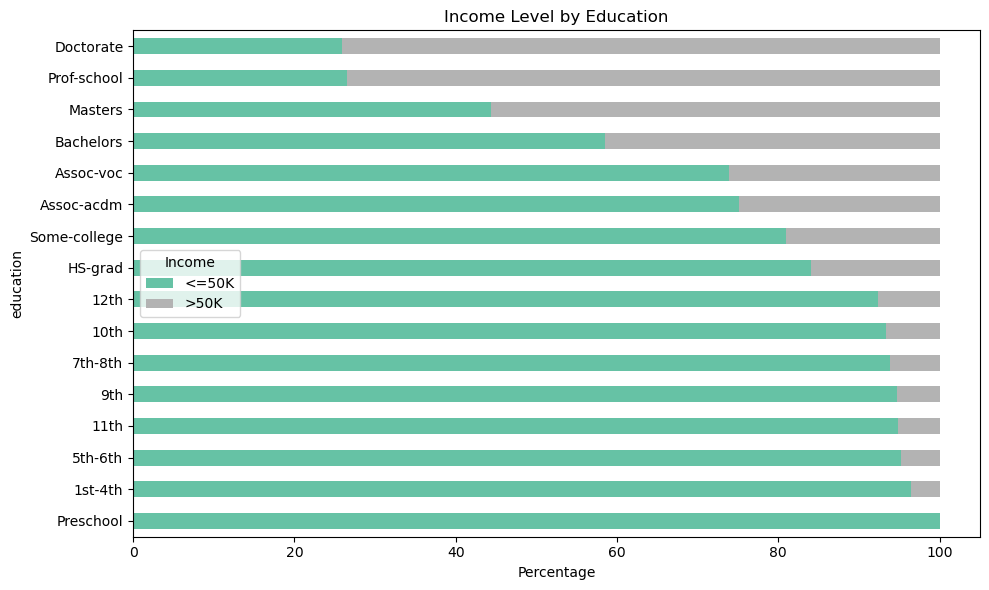

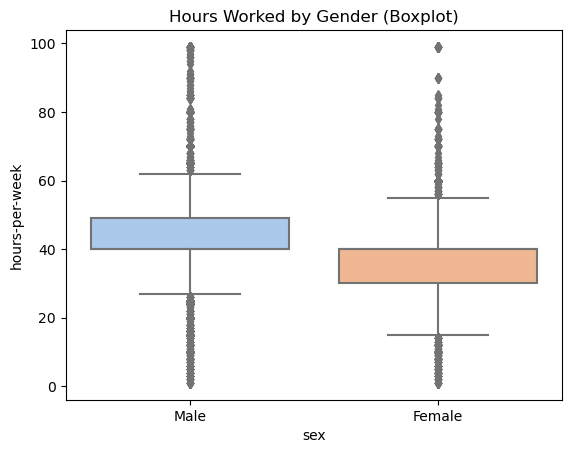

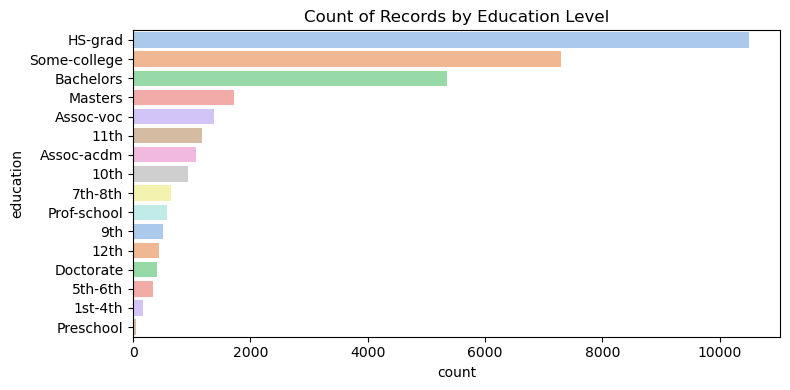

C:\Users\Level 0\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


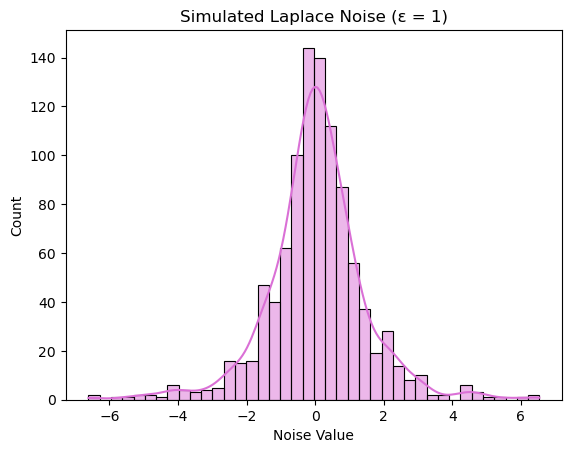

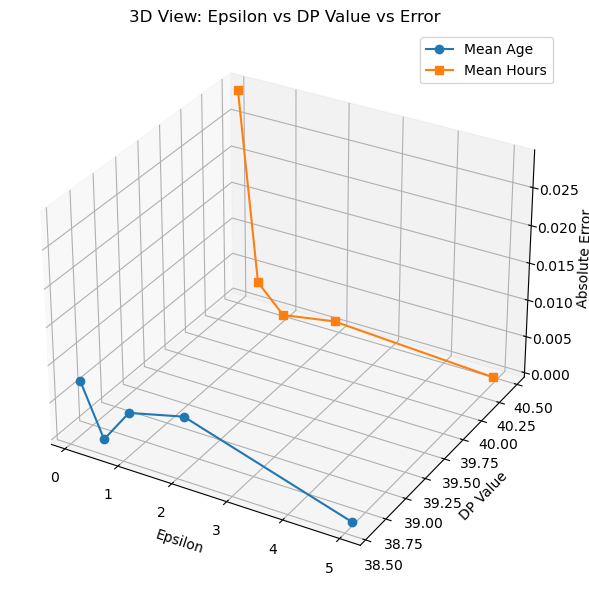

In [40]:
# Plot DP Mean Age and Count Bachelors vs Epsilon
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(results_df["epsilon"], results_df["dp_mean_age"], label="DP Mean Age", marker='o')
plt.axhline(y=true_mean_age, color='r', linestyle='--', label="True Mean Age")
plt.title("Mean Age vs Epsilon")
plt.xlabel("Epsilon")
plt.ylabel("Mean Age")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(results_df["epsilon"], results_df["dp_count_bachelors"], label="DP Count Bachelors", marker='o')
plt.axhline(y=true_count_bachelors, color='r', linestyle='--', label="True Count")
plt.title("Count of Bachelors vs Epsilon")
plt.xlabel("Epsilon")
plt.ylabel("Count")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Plot distributions
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(data['age'], kde=True, bins=30, color='skyblue')
plt.title("Distribution of Age")

plt.subplot(1, 2, 2)
sns.histplot(data['hours-per-week'], kde=True, bins=30, color='salmon')
plt.title("Distribution of Hours Worked per Week")

plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(data[["age", "hours-per-week"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation between Age and Work Hours")
plt.show()

# Income by education (percentage)
edu_income = pd.crosstab(data['education'], data['income'], normalize='index') * 100
edu_income.sort_values(by='>50K').plot(kind='barh', stacked=True, figsize=(10, 6), colormap='Set2')
plt.title("Income Level by Education")
plt.xlabel("Percentage")
plt.legend(title="Income")
plt.tight_layout()
plt.show()

# Boxplot for hours worked by gender
sns.boxplot(x='sex', y='hours-per-week', data=data, palette="pastel")
plt.title("Hours Worked by Gender (Boxplot)")
plt.show()

# Countplot for education levels
plt.figure(figsize=(8, 4))
sns.countplot(y='education', data=data, order=data['education'].value_counts().index, palette="pastel")
plt.title("Count of Records by Education Level")
plt.tight_layout()
plt.show()

# Laplace noise demonstration
noise = np.random.laplace(loc=0, scale=1.0, size=1000)
sns.histplot(noise, kde=True, bins=40, color="orchid")
plt.title("Simulated Laplace Noise (ε = 1)")
plt.xlabel("Noise Value")
plt.show()

# 3D Plot: Epsilon vs DP value vs Error
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

ax.plot(results_df["epsilon"], results_df["dp_mean_age"], results_df["error_mean_age"], label="Mean Age", marker='o')
ax.plot(results_df["epsilon"], results_df["dp_mean_hours"], results_df["error_mean_hours"], label="Mean Hours", marker='s')

ax.set_xlabel('Epsilon')
ax.set_ylabel('DP Value')
ax.set_zlabel('Absolute Error')
ax.set_title('3D View: Epsilon vs DP Value vs Error')
ax.legend()
plt.tight_layout()
plt.show()


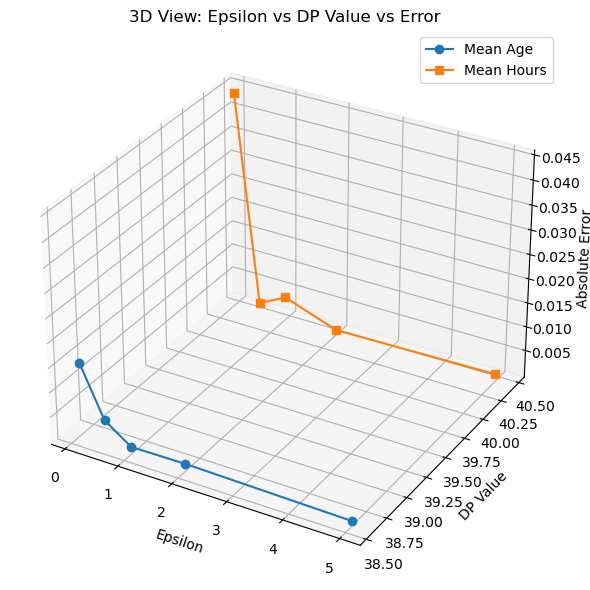

In [29]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

ax.plot(results_df["epsilon"], results_df["dp_mean_age"], results_df["error_mean_age"], label="Mean Age", marker='o')
ax.plot(results_df["epsilon"], results_df["dp_mean_hours"], results_df["error_mean_hours"], label="Mean Hours", marker='s')
ax.set_xlabel('Epsilon')
ax.set_ylabel('DP Value')
ax.set_zlabel('Absolute Error')
ax.set_title('3D View: Epsilon vs DP Value vs Error')
ax.legend()
plt.tight_layout()
plt.show()
